# Evaluation project-Telecom_customer_churn

In [159]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [160]:
df=pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


 target variables---> churn

In [161]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [162]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [163]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Understanding the Datasets:

Following are the columns in dataset

customerID       -- It indicates the ID of customer
gender           -- It  indicates the gender of customer.
SeniorCitizen    -- It  indicates SeniorCitizen data
Partner          -- It  indicates whether the person is partner or not
Dependent        --- It  indicates dependandacy.
tenure           -- It indicates period
PhoneService     -- It indicates PhoneService
MultipleLines    -- It indicates MultipleLines
InternetService   -- It inducates InternetService
OnlineSecurity    -- It inducates OnlineSecurity
OnlineBackup      -- It inducates OnlineBackup
DeviceProtection  -- It indicates DeviceProtection
TechSupport       -- It indicates whether there is any tech support or not
StreamingTV       --  It indicates Tv is streaming or not
StreamingMovies   --  It indicates movies is streaming or not
Contract          -- It indicates the contract.
PaperlessBilling  -- It indicate Paperless Billing
PaymentMethod     -- It indicate Payment Method
MonthlyCharges    -- It indicate Monthly Charges
TotalCharges      -- It indicate total Charges   
Churn             -- The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop                      doing business with an entity. 

we can drop customerID as it contains only a index number.

In [164]:
df.drop(['customerID'],axis=1,inplace=True)

# Data Visualization

for Categorical Features we will use count plot it will give frequecy of the classes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object

Male      3555
Female    3488
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

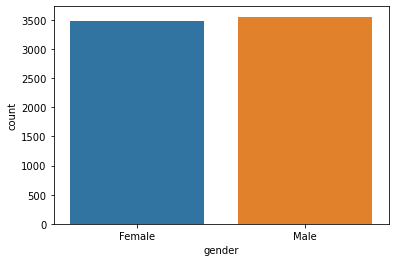

In [165]:
ax=df['gender'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['gender'])


Male candidates are more than female,

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

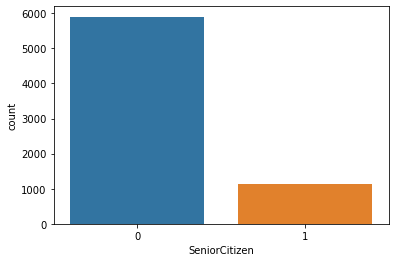

In [166]:
ax=df['SeniorCitizen'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['SeniorCitizen'])


SeniorCitizen are 
0    5901
1    1142

No     3641
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

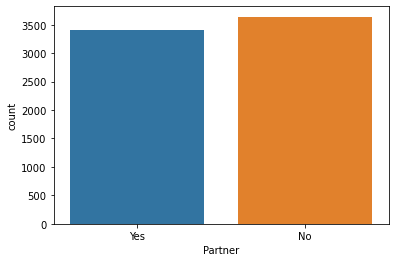

In [167]:
ax=df['Partner'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['Partner'])


Partner count is
No     3641
Yes    3402


No     4933
Yes    2110
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

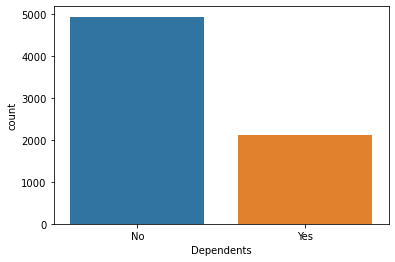

In [168]:
ax=df['Dependents'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['Dependents'])


Dependents are not more than 2000

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


<AxesSubplot:xlabel='tenure', ylabel='count'>

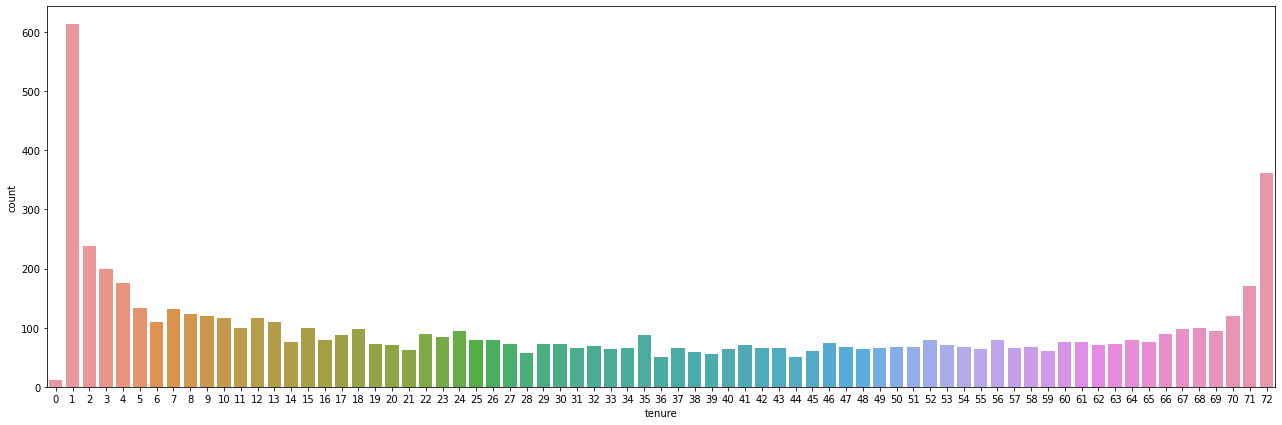

In [169]:
ax=df['tenure'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['tenure'])


tenure is from 0 to 72

Yes    6361
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

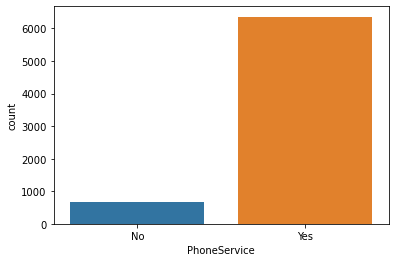

In [170]:
ax=df['PhoneService'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['PhoneService'])


PhoneService is available for number of times.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

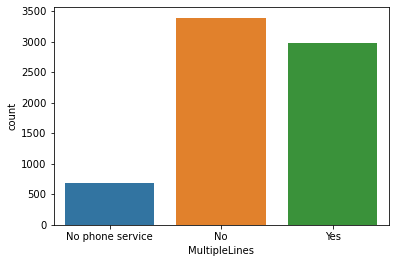

In [171]:
ax=df['MultipleLines'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['MultipleLines'])


MultipleLines are 

No                  3390
Yes                 2971
No phone service     682

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


<AxesSubplot:xlabel='InternetService', ylabel='count'>

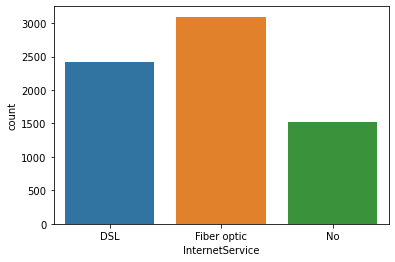

In [172]:
ax=df['InternetService'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['InternetService'])


InternetService are

Fiber optic    3096
DSL            2421
No             1526

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

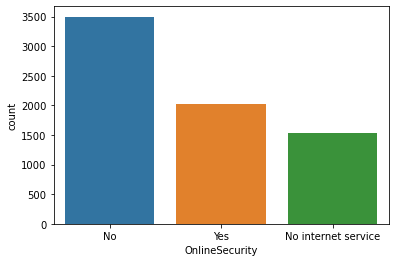

In [173]:
ax=df['OnlineSecurity'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['OnlineSecurity'])


OnlineSecurity are 
No                     3498
Yes                    2019
No internet service    1526

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

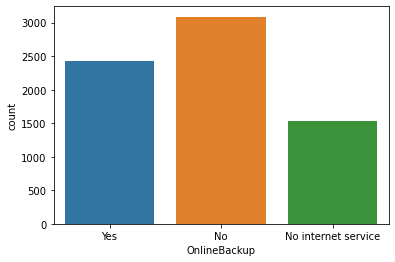

In [174]:
ax=df['OnlineBackup'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['OnlineBackup'])


OnlineBackup are 
No                     3088
Yes                    2429
No internet service    1526

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

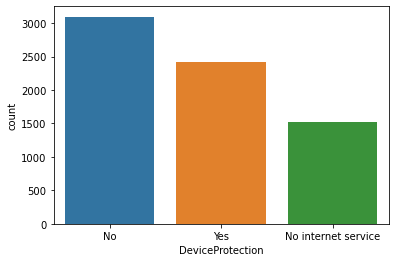

In [175]:
ax=df['DeviceProtection'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['DeviceProtection'])


DeviceProtection are

No                     3095
Yes                    2422
No internet service    1526

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

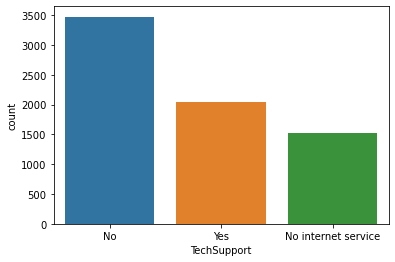

In [176]:
ax=df['TechSupport'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['TechSupport'])


TechSupport are
No                     3473
Yes                    2044
No internet service    1526

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

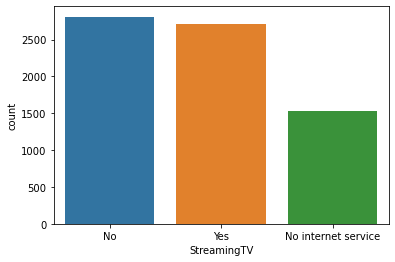

In [177]:
ax=df['StreamingTV'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['StreamingTV'])


StreamingTV are
No                     2810
Yes                    2707
No internet service    1526

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

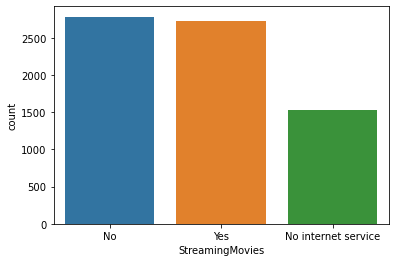

In [178]:
ax=df['StreamingMovies'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['StreamingMovies'])


StreamingMovies are
No                     2785
Yes                    2732
No internet service    1526

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

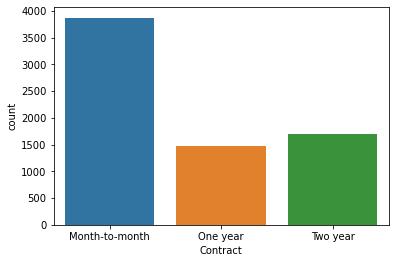

In [179]:
ax=df['Contract'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['Contract'])


Contract are 
Month-to-month    3875
Two year          1695
One year          1473

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

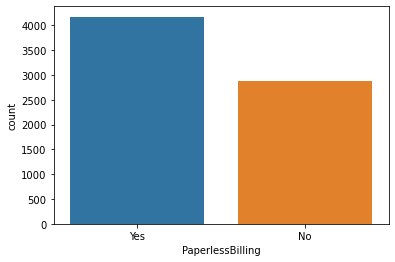

In [180]:
ax=df['PaperlessBilling'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['PaperlessBilling'])


PaperlessBilling are 
Yes    4171
No     2872

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

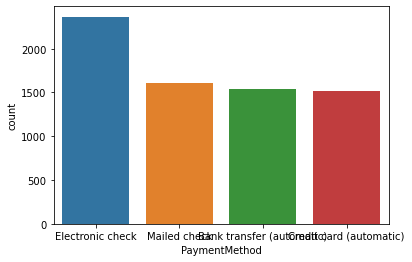

In [181]:
ax=df['PaymentMethod'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['PaymentMethod'])


PaymentMethod are 
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

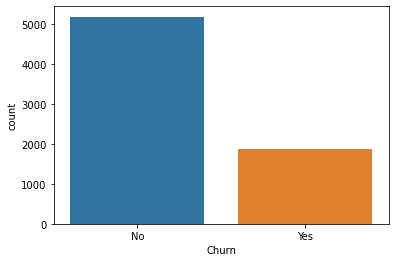

In [182]:
ax=df['Churn'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['Churn'])


Churn counts are 
No     5174
Yes    1869

# Checking unique values

In [183]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [184]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [185]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [186]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [187]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [188]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [189]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [190]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [191]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [192]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [193]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [194]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [195]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [196]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [197]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [198]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [199]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [200]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

# Encoding of the data

In [201]:
lencoder=LabelEncoder()
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')


In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [203]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

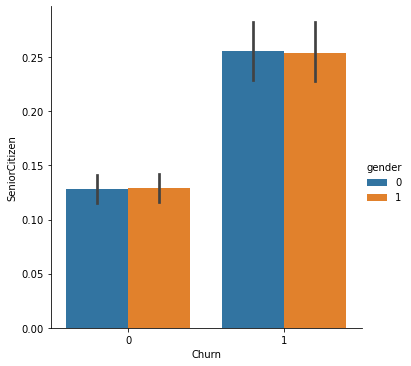

In [204]:
g=sns.catplot(y='SeniorCitizen',x='Churn',hue='gender',data=df,kind='bar')
plt.show()

SeniorCitizen are more to churn

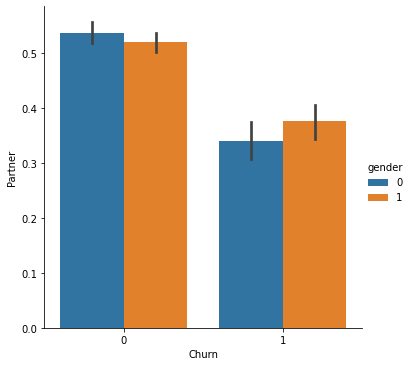

In [205]:
g=sns.catplot(y='Partner',x='Churn',hue='gender',data=df,kind='bar')
plt.show()

Partner are not more churn

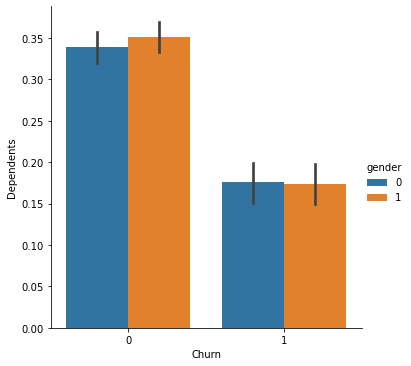

In [206]:
g=sns.catplot(y='Dependents',x='Churn',hue='gender',data=df,kind='bar')
plt.show()

from above plot Dependents are not churn

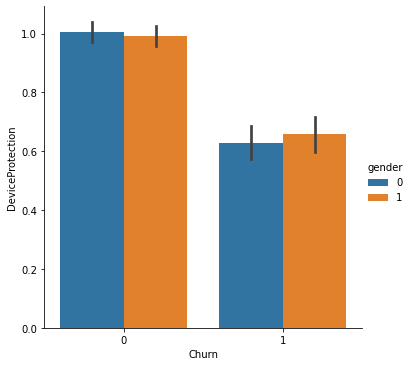

In [207]:
g=sns.catplot(y='DeviceProtection',x='Churn',hue='gender',data=df,kind='bar')
plt.show()

DeviceProtection are customers stop doing business with an entity. 

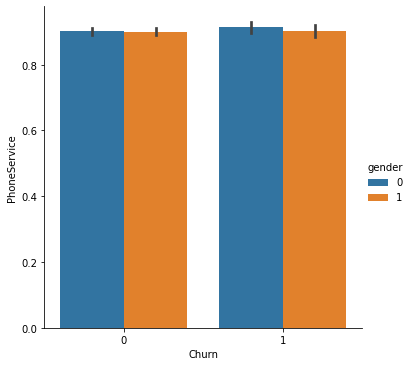

In [208]:
g=sns.catplot(y='PhoneService',x='Churn',hue='gender',data=df,kind='bar')
plt.show()

PhoneService is available in all cases

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

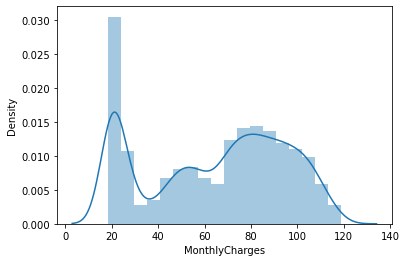

In [209]:
sns.distplot(df['MonthlyCharges'],kde=True)

data is not normalized and high at 20

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

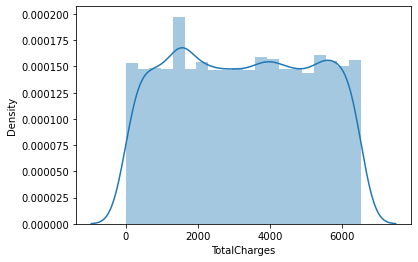

In [210]:
sns.distplot(df['TotalCharges'],kde=True)

it is max at 2000

<AxesSubplot:xlabel='tenure', ylabel='Density'>

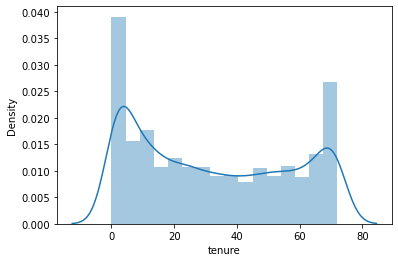

In [211]:
sns.distplot(df['tenure'],kde=True)

# Describe the dataset

In [212]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


<AxesSubplot:>

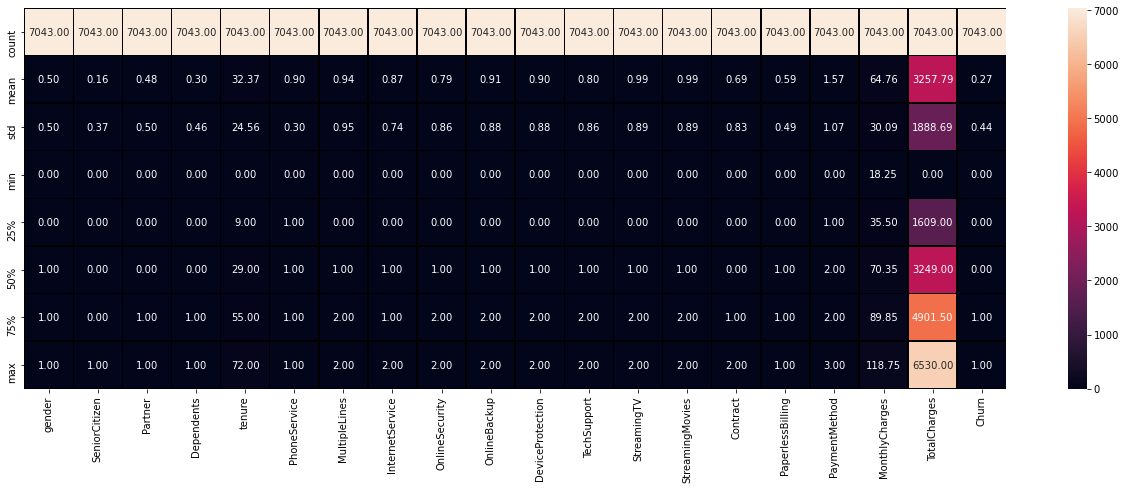

In [213]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


# Correlation of the columns with the target columns

In [214]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

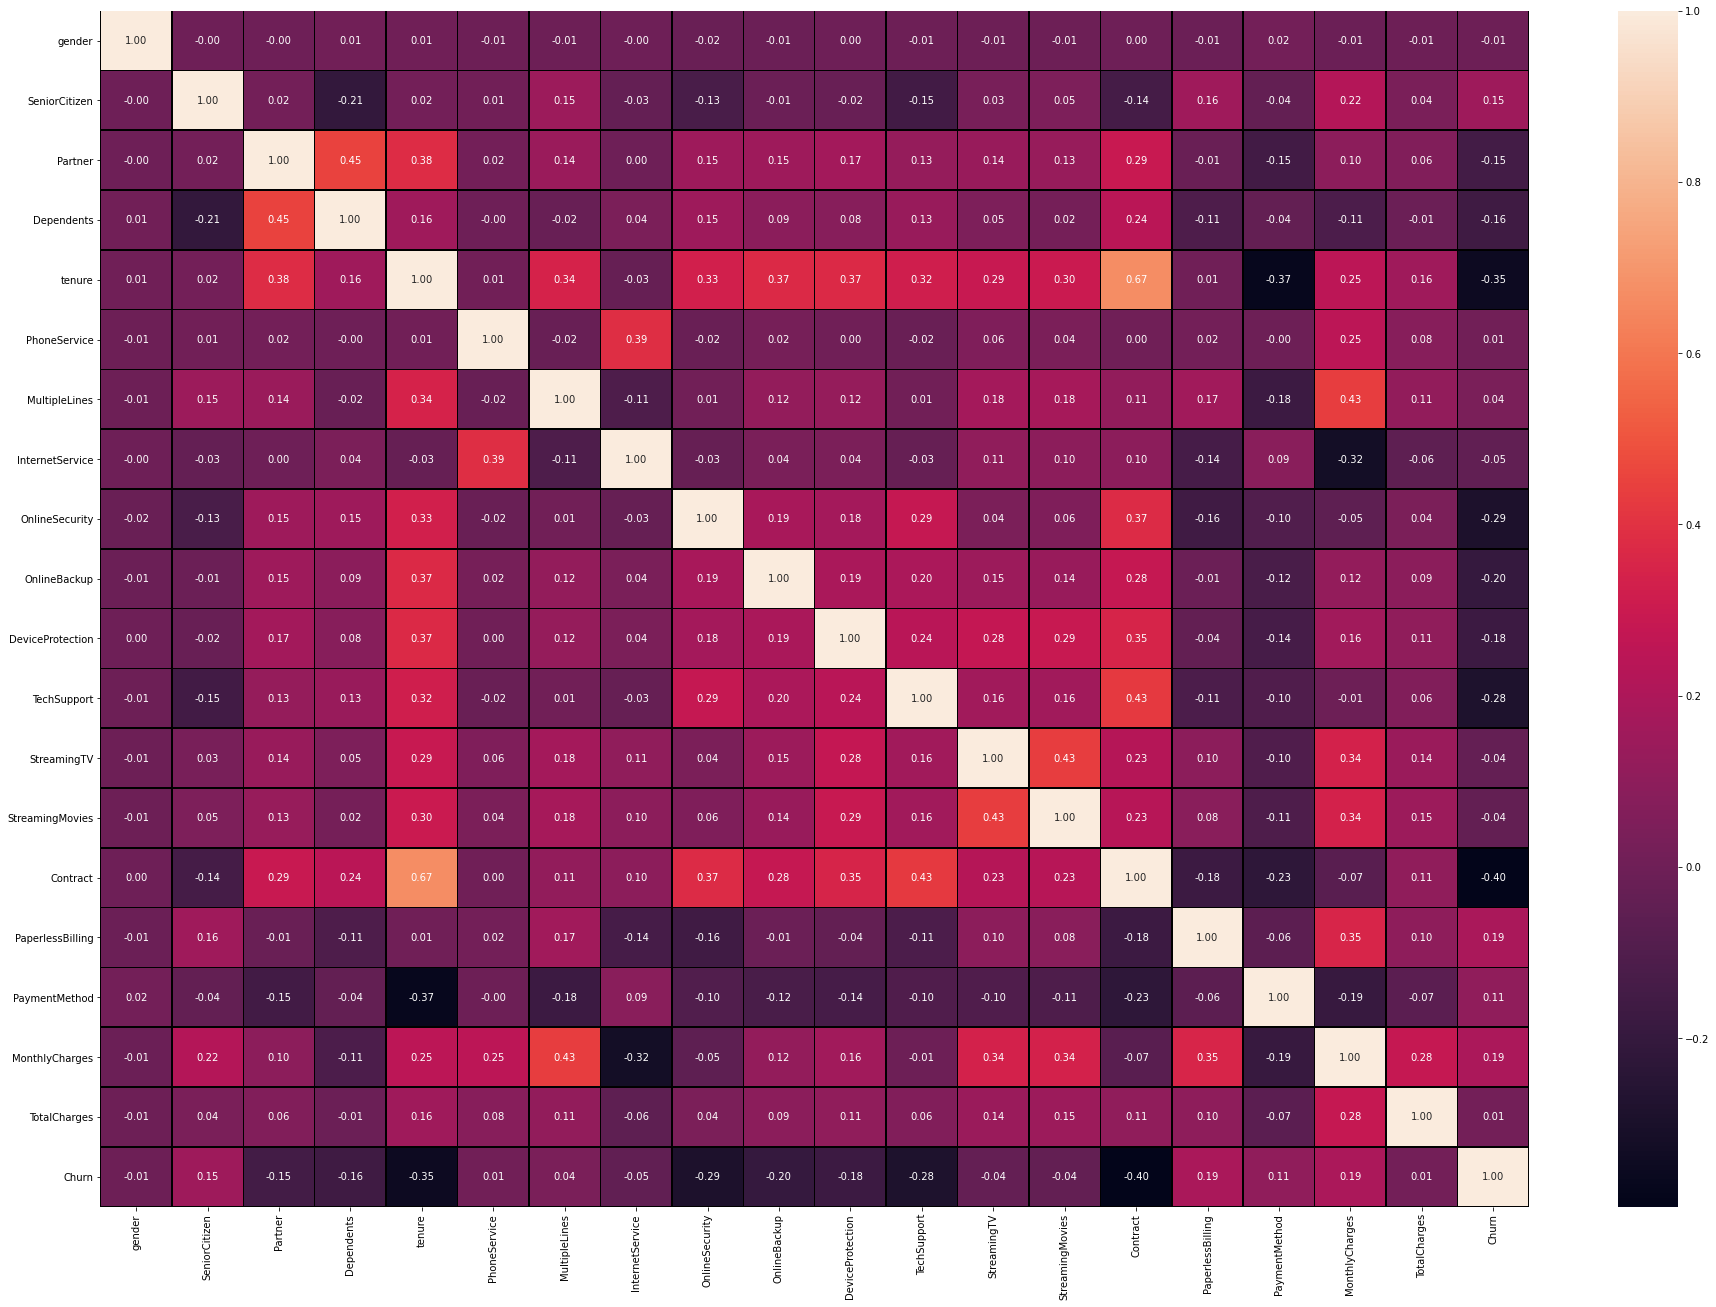

In [215]:
plt.figure(figsize=(32,22))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


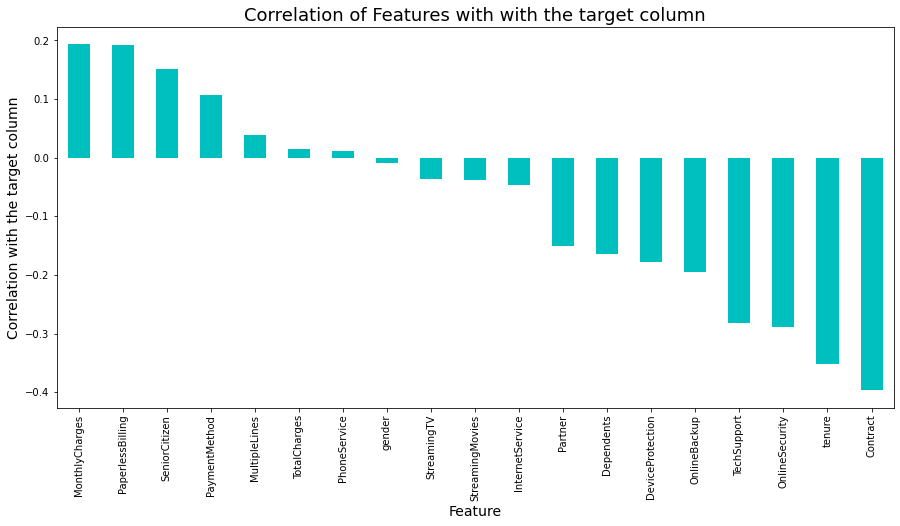

In [216]:
plt.figure(figsize=(15,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


In [222]:
dfx=df.copy()
dfx.drop("Churn",axis=1,inplace=True)

In [223]:
dfx

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [224]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [225]:
def calc_vif(dfx):
    vif=pd.DataFrame()
    vif['variables']=dfx.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    return(vif)

In [226]:
calc_vif(dfx)

,variables,VIF_Factor
0,gender,1.930602
1,SeniorCitizen,1.366680
2,Partner,2.820768
3,Dependents,1.953659
4,tenure,7.476538
5,PhoneService,14.252701
6,MultipleLines,2.753961
7,InternetService,4.327149
8,OnlineSecurity,2.252831
9,OnlineBackup,2.436458


MonthlyCharges	15.539771 it is having high vif so we drop it

In [227]:
dfx.drop(["MonthlyCharges"],axis=1,inplace=True)

In [228]:
def calc_vif(dfx):
    vif=pd.DataFrame()
    vif['variables']=dfx.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    return(vif)

In [229]:
calc_vif(dfx)

,variables,VIF_Factor
0,gender,1.929228
1,SeniorCitizen,1.342994
2,Partner,2.816816
3,Dependents,1.948197
4,tenure,7.307102
5,PhoneService,8.691932
6,MultipleLines,2.419740
7,InternetService,3.121459
8,OnlineSecurity,2.252359
9,OnlineBackup,2.421119


PhoneService--> 8.691932 is having high vif so we drop it

In [230]:
dfx.drop(["PhoneService"],axis=1,inplace=True)

In [231]:
def calc_vif(dfx):
    vif=pd.DataFrame()
    vif['variables']=dfx.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    return(vif)

In [232]:
calc_vif(dfx)

,variables,VIF_Factor
0,gender,1.892197
1,SeniorCitizen,1.339340
2,Partner,2.807952
3,Dependents,1.944608
4,tenure,7.210134
5,MultipleLines,2.408359
6,InternetService,2.340400
7,OnlineSecurity,2.226050
8,OnlineBackup,2.415386
9,DeviceProtection,2.590685


In [ ]:
tenure	7.210134 we need to drop this column

In [233]:
dfx.drop(["tenure"],axis=1,inplace=True)

In [234]:
def calc_vif(dfx):
    vif=pd.DataFrame()
    vif['variables']=dfx.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    return(vif)

In [235]:
calc_vif(dfx)

,variables,VIF_Factor
0,gender,1.883873
1,SeniorCitizen,1.329560
2,Partner,2.674147
3,Dependents,1.940053
4,MultipleLines,2.207001
5,InternetService,2.338533
6,OnlineSecurity,2.178371
7,OnlineBackup,2.298242
8,DeviceProtection,2.553230
9,TechSupport,2.358681


Now vif is less than 5 so now multicollinearity is not in present dataset.

# Skewness

In [236]:
dfx.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
TotalCharges        0.015857
dtype: float64

In some column skewness is present but this all column are in good correlation with target column hence no need to remove skewness.

# Outliers Check:

<AxesSubplot:>

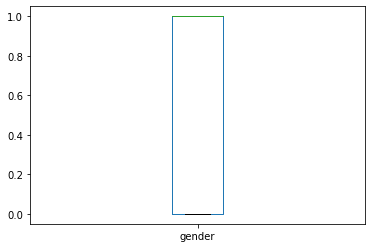

In [134]:
df['gender'].plot.box()

<AxesSubplot:>

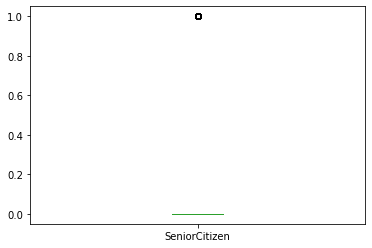

In [135]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

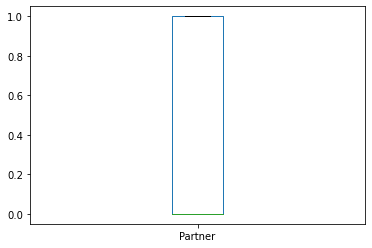

In [136]:
df['Partner'].plot.box()

<AxesSubplot:>

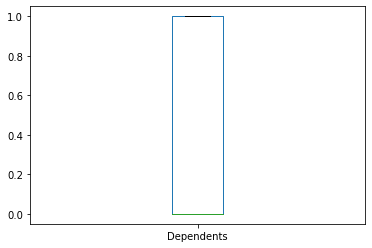

In [137]:
df['Dependents'].plot.box()

<AxesSubplot:>

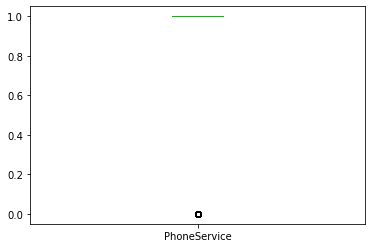

In [138]:
df['PhoneService'].plot.box()

<AxesSubplot:>

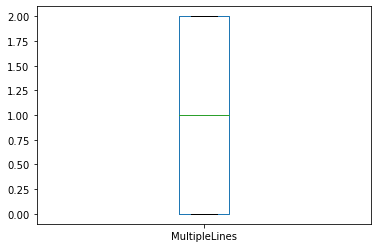

In [139]:
df['MultipleLines'].plot.box()

<AxesSubplot:>

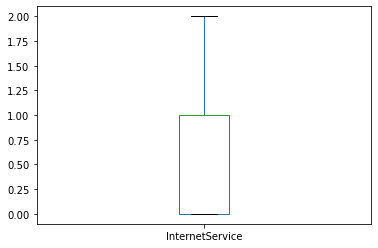

In [140]:
df['InternetService'].plot.box()

<AxesSubplot:>

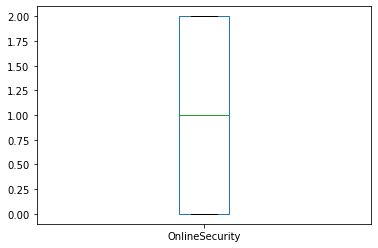

In [141]:
df['OnlineSecurity'].plot.box()

<AxesSubplot:>

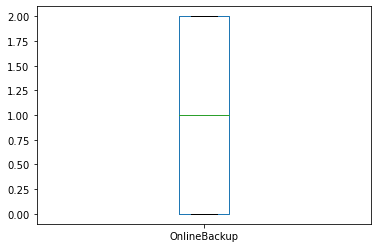

In [142]:
df['OnlineBackup'].plot.box()

<AxesSubplot:>

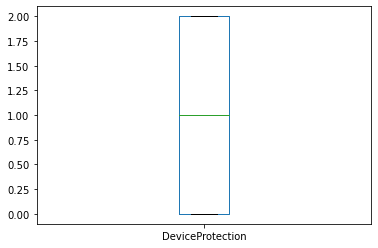

In [143]:
df['DeviceProtection'].plot.box()

<AxesSubplot:>

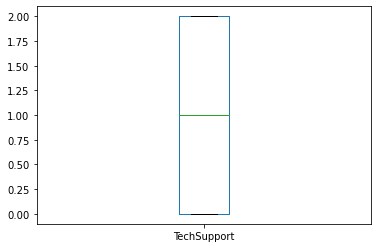

In [144]:
df['TechSupport'].plot.box()

<AxesSubplot:>

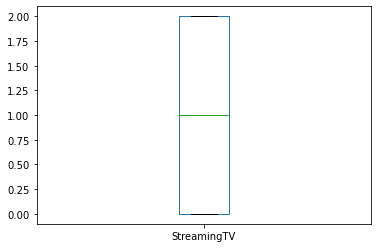

In [145]:
df['StreamingTV'].plot.box()

<AxesSubplot:>

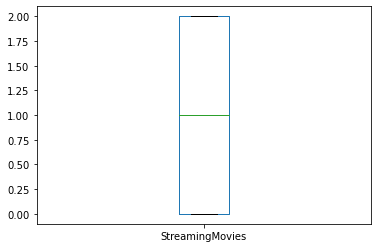

In [146]:
df['StreamingMovies'].plot.box()

<AxesSubplot:>

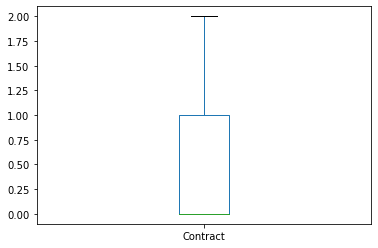

In [147]:
df['Contract'].plot.box()

<AxesSubplot:>

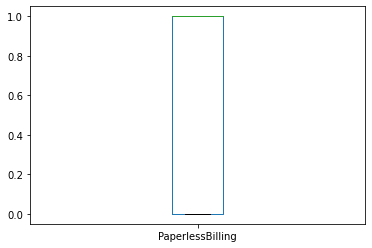

In [148]:
df['PaperlessBilling'].plot.box()

<AxesSubplot:>

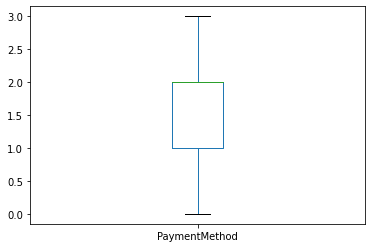

In [149]:
df['PaymentMethod'].plot.box()

<AxesSubplot:>

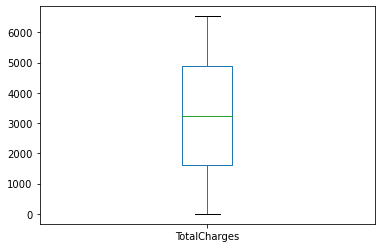

In [150]:
df['TotalCharges'].plot.box()

# Now we use subplot and displot to check data are normalised or not

In [151]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

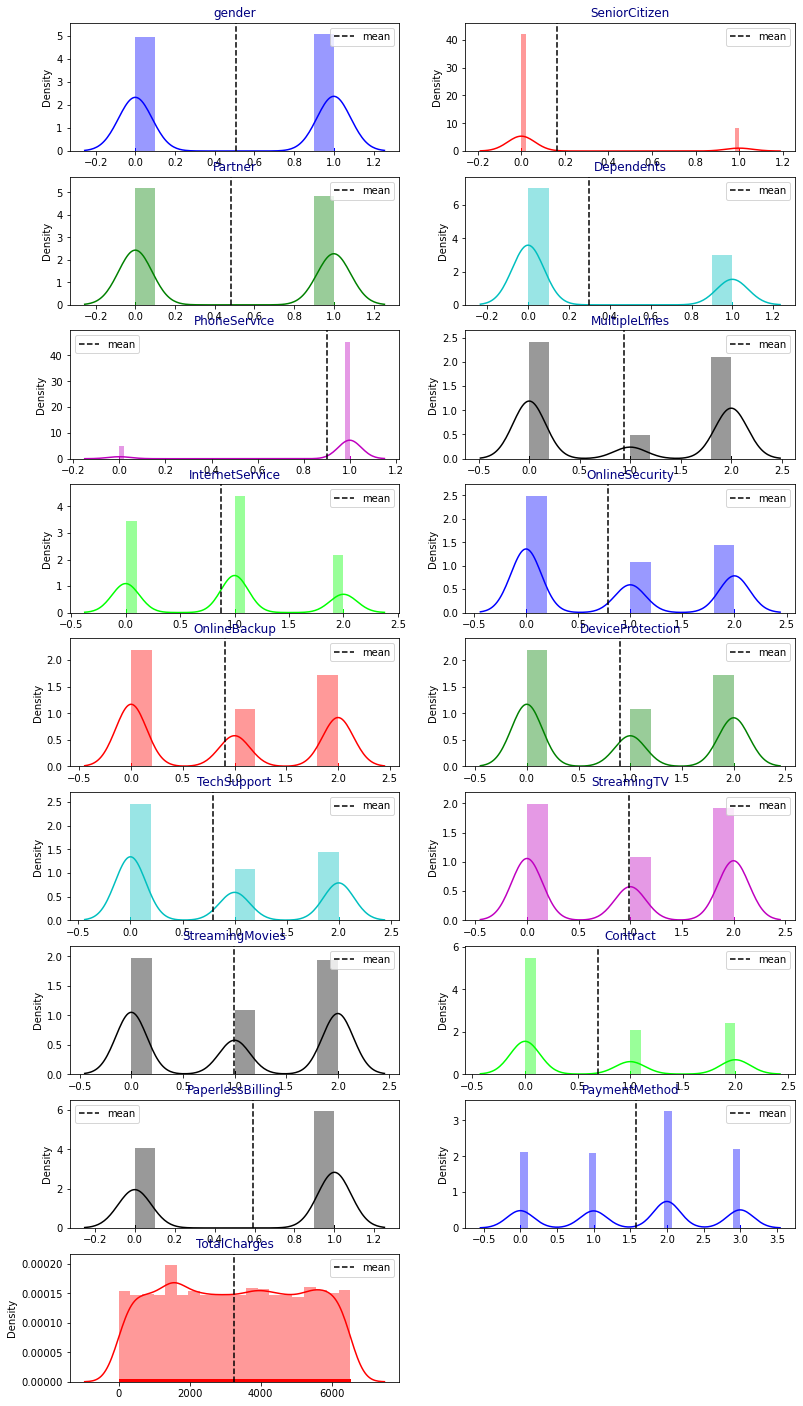

In [152]:
import itertools

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","k","b","r"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(9,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

data is not normalized hence outliers are present

In [241]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [242]:
dfx

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,2505
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1466
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,157
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1597
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,5698
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,2994
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,2660


In [243]:
df.drop(["MonthlyCharges"],axis=1,inplace=True)

In [244]:
df.drop(["PhoneService"],axis=1,inplace=True)

In [245]:
df.drop(["tenure"],axis=1,inplace=True)

In [251]:
df

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,2994,0
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,2660,1


# Outliers Removal

In [256]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

In [257]:
df_new=df[(z<3).all(axis=1)]
df_new

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,2994,0
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,2660,1


In [258]:
df.shape

(7043, 17)

Sometimes z-score unable to remove outliers. So we prefer IQR here over z-score

In [260]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gender                 1.0
SeniorCitizen          0.0
Partner                1.0
Dependents             1.0
MultipleLines          2.0
InternetService        1.0
OnlineSecurity         2.0
OnlineBackup           2.0
DeviceProtection       2.0
TechSupport            2.0
StreamingTV            2.0
StreamingMovies        2.0
Contract               1.0
PaperlessBilling       1.0
PaymentMethod          1.0
TotalCharges        3292.5
Churn                  1.0
dtype: float64


In [261]:
df_new1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new1.shape)

(5901, 17)


# Percentage loss of data

In [262]:
percentage_loss=((7043-5901)/7043)*100
print(percentage_loss)

16.21468124378816


# Sparating the target and feature column

In [263]:
feature=df_new1.drop("Churn",axis=1)
target=df_new1["Churn"]

In [264]:
x=feature
y=target

# Scaling the data using the min max scaler

In [265]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.        , 0.        , 1.        , ..., 1.        , 0.66666667,
        0.38361409],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.2245023 ],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.02404288],
       ...,
       [0.        , 0.        , 1.        , ..., 1.        , 0.33333333,
        0.87258806],
       [0.        , 0.        , 1.        , ..., 1.        , 0.66666667,
        0.45849923],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.8280245 ]])

# Applying SMOTE

In [266]:
from imblearn.over_sampling import SMOTE

In [267]:
y.value_counts()

0    4508
1    1393
Name: Churn, dtype: int64

In [268]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [269]:
trainy.value_counts()

1    4508
0    4508
Name: Churn, dtype: int64

# Logistic Regression

In [270]:
lr=LogisticRegression()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    lr.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training accuracy_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 142 The model performs very well
At random state:- 142
Training accuracy_score is:- 74.94453688297283
Testing accuracy_score is:- 74.94456762749445
At random state 164 The model performs very well
At random state:- 164
Training accuracy_score is:- 75.0277315585136
Testing accuracy_score is:- 75.0
At random state 242 The model performs very well
At random state:- 242
Training accuracy_score is:- 74.91680532445923
Testing accuracy_score is:- 74.88913525498891
At random state 277 The model performs very well
At random state:- 277
Training accuracy_score is:- 74.88907376594565
Testing accuracy_score is:- 74.94456762749445
At random state 305 The model performs very well
At random state:- 305
Training accuracy_score is:- 74.90293954520244
Testing accuracy_score is:- 74.94456762749445
At random state 319 The model performs very well
At random state:- 319
Training accuracy_score is:- 74.93067110371602
Testing accuracy_score is:- 74.88913525498891
At random state 328 The model 

In [271]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=959,test_size=0.20)

In [273]:
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[348 523]
 [400 533]]
              precision    recall  f1-score   support

           0       0.47      0.40      0.43       871
           1       0.50      0.57      0.54       933

    accuracy                           0.49      1804
   macro avg       0.48      0.49      0.48      1804
weighted avg       0.49      0.49      0.48      1804



# Cross validation for logistic regression

In [274]:
from sklearn.model_selection import cross_val_score
pred_lr = lr.predict(x_test)

lrcs= accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lrscore = cross_val_score(lr,trainx,trainy,cv=j)
    lrc = lrscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lrc*100 )
    print("accuracy_score is :-",lrcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 75.0776397515528
accuracy_score is :- 75.66518847006651


At cv:- 3
Cross validation score is:- 74.81156747329892
accuracy_score is :- 75.66518847006651


At cv:- 4
Cross validation score is:- 74.95563442768413
accuracy_score is :- 75.66518847006651


At cv:- 5
Cross validation score is:- 75.03327787021631
accuracy_score is :- 75.66518847006651


At cv:- 6
Cross validation score is:- 75.03348090030917
accuracy_score is :- 75.66518847006651


At cv:- 7
Cross validation score is:- 74.96672582076307
accuracy_score is :- 75.66518847006651


At cv:- 8
Cross validation score is:- 74.87799467613132
accuracy_score is :- 75.66518847006651


At cv:- 9
Cross validation score is:- 74.80039366266911
accuracy_score is :- 75.66518847006651




In [275]:
print("At cv:-",5)
print("Cross validation score is:-",75.033 )
print("Accuracy_score is :-",75.665)

At cv:- 5
Cross validation score is:- 75.033
Accuracy_score is :- 75.665


# AUC-ROC curve

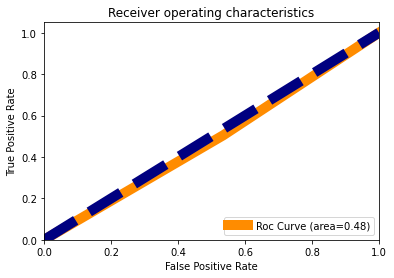

In [276]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [277]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

0.7542469448453997

# Classification model buliding

In [ ]:
svc=SVC(kernel='rbf')
for i in range(1,2000):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [279]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=53,test_size=0.20)

In [280]:
def svmkernel(ker):
    svc=SVC(kernel=ker)  
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_test=svc.predict(x_test)
    print(accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))


In [281]:
svmkernel('rbf')

0.8082039911308204
[[673 262]
 [ 84 785]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       935
           1       0.75      0.90      0.82       869

    accuracy                           0.81      1804
   macro avg       0.82      0.81      0.81      1804
weighted avg       0.82      0.81      0.81      1804



# Cross-validation for SVM for rbf kernel

In [282]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,trainx,trainy,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 78.5270629991127
accuracy_score is :- 83.03769401330376


At cv:- 3
Cross validation score is:- 79.31476665821619
accuracy_score is :- 83.03769401330376


At cv:- 4
Cross validation score is:- 79.70275066548358
accuracy_score is :- 83.03769401330376


At cv:- 5
Cross validation score is:- 79.86937882538712
accuracy_score is :- 83.03769401330376


At cv:- 6
Cross validation score is:- 80.0801563022793
accuracy_score is :- 83.03769401330376


At cv:- 7
Cross validation score is:- 79.91348713398402
accuracy_score is :- 83.03769401330376


At cv:- 8
Cross validation score is:- 80.04658385093167
accuracy_score is :- 83.03769401330376


At cv:- 9
Cross validation score is:- 80.10217770696812
accuracy_score is :- 83.03769401330376




In [283]:
print("At cv:-",9)
print("Cross validation score is:-",80.102)
print("Accuracy_score is :-",83.037)

At cv:- 9
Cross validation score is:- 80.102
Accuracy_score is :- 83.037


In [284]:
svmkernel('linear')

0.7211751662971175
[[542 393]
 [110 759]]
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       935
           1       0.66      0.87      0.75       869

    accuracy                           0.72      1804
   macro avg       0.75      0.73      0.72      1804
weighted avg       0.75      0.72      0.72      1804



In [285]:
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.5069328896283971
0.4911308203991131
[[414 521]
 [397 472]]
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       935
           1       0.48      0.54      0.51       869

    accuracy                           0.49      1804
   macro avg       0.49      0.49      0.49      1804
weighted avg       0.49      0.49      0.49      1804



# Cross-validation for SVM for linear kernel

In [286]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,trainx,trainy,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 78.5270629991127
accuracy_score is :- 83.03769401330376


At cv:- 3
Cross validation score is:- 79.31476665821619
accuracy_score is :- 83.03769401330376


At cv:- 4
Cross validation score is:- 79.70275066548358
accuracy_score is :- 83.03769401330376


At cv:- 5
Cross validation score is:- 79.86937882538712
accuracy_score is :- 83.03769401330376


At cv:- 6
Cross validation score is:- 80.0801563022793
accuracy_score is :- 83.03769401330376


At cv:- 7
Cross validation score is:- 79.91348713398402
accuracy_score is :- 83.03769401330376


At cv:- 8
Cross validation score is:- 80.04658385093167
accuracy_score is :- 83.03769401330376


At cv:- 9
Cross validation score is:- 80.10217770696812
accuracy_score is :- 83.03769401330376




In [287]:
print("At cv:-",9)
print("Cross validation score is:-",80.102)
print("Accuracy_score is :-", 83.037)

At cv:- 9
Cross validation score is:- 80.102
Accuracy_score is :- 83.037


In [288]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [289]:
svcr = SVC(C=10, kernel='rbf')
svcr.fit(x_train,y_train)
svcr.score(x_train,y_train)
pred_svcr = svcr.predict(x_test)

svcsr = accuracy_score(y_test,pred_svcr)
print('Accuracy Score:',svcsr*100)

svcrscore = cross_val_score(svcr,trainx,trainy,cv=9)
svccr = svcrscore.mean() 
print('Cross Val Score:',svccr*100)

Accuracy Score: 81.81818181818183
Cross Val Score: 83.07496451209026


# Auc roc curve for SVM with 'rbf' kernel

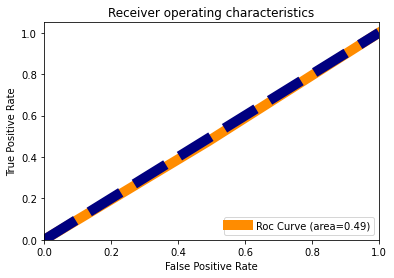

In [290]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [291]:
dtc=DecisionTreeClassifier()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [292]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=53,test_size=0.20)

In [293]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8098669623059866
0.9977814753189129
[[727 208]
 [135 734]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       935
           1       0.78      0.84      0.81       869

    accuracy                           0.81      1804
   macro avg       0.81      0.81      0.81      1804
weighted avg       0.81      0.81      0.81      1804



In [294]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    dtcscore = cross_val_score(dtc,trainx,trainy,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 77.88376220053239
accuracy_score is :- 80.98669623059867


At cv:- 3
Cross validation score is:- 79.48192725290775
accuracy_score is :- 80.98669623059867


At cv:- 4
Cross validation score is:- 79.63620230700977
accuracy_score is :- 80.98669623059867


At cv:- 5
Cross validation score is:- 79.40445402033812
accuracy_score is :- 80.98669623059867


At cv:- 6
Cross validation score is:- 79.81468635446963
accuracy_score is :- 80.98669623059867


At cv:- 7
Cross validation score is:- 79.63620230700975
accuracy_score is :- 80.98669623059867


At cv:- 8
Cross validation score is:- 79.85803016858918
accuracy_score is :- 80.98669623059867


At cv:- 9
Cross validation score is:- 80.29163118983479
accuracy_score is :- 80.98669623059867




In [295]:
print("At cv:-",9)
print("Cross validation score is:-",80.291)
print("Accuracy_score is :-", 80.986)


At cv:- 9
Cross validation score is:- 80.291
Accuracy_score is :- 80.986


In [296]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=6)
Best parameters are:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6}
Accuracy score:  0.8086522462562395


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [298]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=53,test_size=0.20)

In [299]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7838137472283814
[[627 308]
 [ 82 787]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       935
           1       0.72      0.91      0.80       869

    accuracy                           0.78      1804
   macro avg       0.80      0.79      0.78      1804
weighted avg       0.80      0.78      0.78      1804



In [300]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,6):
    knnscore = cross_val_score(knn,trainx,trainy,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 78.24977817213842
accuracy_score is :- 78.38137472283813


At cv:- 3
Cross validation score is:- 78.9930067762423
accuracy_score is :- 78.38137472283813


At cv:- 4
Cross validation score is:- 79.23691215616682
accuracy_score is :- 78.38137472283813


At cv:- 5
Cross validation score is:- 79.31461852812447
accuracy_score is :- 78.38137472283813




In [301]:
print("At cv:-",2)
print("Cross validation score is:-",78.249)
print("Accuracy_score is :-", 78.381)

At cv:- 2
Cross validation score is:- 78.249
Accuracy_score is :- 78.381


# Auc Roc Curve

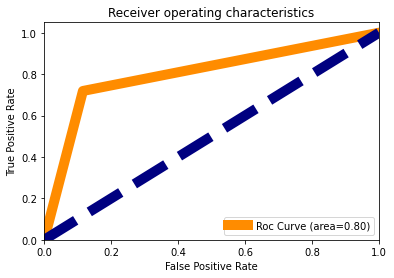

In [302]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [303]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.49916805324459235
testing Accuracy= 0.7838137472283814
[[627 308]
 [ 82 787]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       935
           1       0.72      0.91      0.80       869

    accuracy                           0.78      1804
   macro avg       0.80      0.79      0.78      1804
weighted avg       0.80      0.78      0.78      1804



In [304]:
rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

rfcs= accuracy_score(y_test,pred_rf)
for j in range(2,10):
    rfscore = cross_val_score(rf,trainx,trainy,cv=j)
    rfc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",rfc*100 )
    print("accuracy_score is :-",rfcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 83.09671694764862
accuracy_score is :- 86.36363636363636


At cv:- 3
Cross validation score is:- 83.81871494577862
accuracy_score is :- 86.36363636363636


At cv:- 4
Cross validation score is:- 84.42768411712511
accuracy_score is :- 86.36363636363636


At cv:- 5
Cross validation score is:- 84.90586642366196
accuracy_score is :- 86.36363636363636


At cv:- 6
Cross validation score is:- 84.81702817179666
accuracy_score is :- 86.36363636363636


At cv:- 7
Cross validation score is:- 84.83806566104703
accuracy_score is :- 86.36363636363636


At cv:- 8
Cross validation score is:- 85.17080745341616
accuracy_score is :- 86.36363636363636


At cv:- 9
Cross validation score is:- 85.22750259277205
accuracy_score is :- 86.36363636363636




In [305]:
print("At cv:-",9)
print("Cross validation score is:-",85.227)
print("Accuracy_score is :-", 86.363)

At cv:- 9
Cross validation score is:- 85.227
Accuracy_score is :- 86.363


In [306]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.49916805324459235
testing Accuracy= 0.7838137472283814
[[627 308]
 [ 82 787]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       935
           1       0.72      0.91      0.80       869

    accuracy                           0.78      1804
   macro avg       0.80      0.79      0.78      1804
weighted avg       0.80      0.78      0.78      1804



In [307]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)

adcs= accuracy_score(y_test,pred_ad)
for j in range(2,10):
    adscore = cross_val_score(ad,trainx,trainy,cv=j)
    adc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",adc*100 )
    print("accuracy_score is :-",adcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 85.22750259277205
accuracy_score is :- 82.76053215077606


At cv:- 3
Cross validation score is:- 85.22750259277205
accuracy_score is :- 82.76053215077606


At cv:- 4
Cross validation score is:- 85.22750259277205
accuracy_score is :- 82.76053215077606


At cv:- 5
Cross validation score is:- 85.22750259277205
accuracy_score is :- 82.76053215077606


At cv:- 6
Cross validation score is:- 85.22750259277205
accuracy_score is :- 82.76053215077606


At cv:- 7
Cross validation score is:- 85.22750259277205
accuracy_score is :- 82.76053215077606


At cv:- 8
Cross validation score is:- 85.22750259277205
accuracy_score is :- 82.76053215077606


At cv:- 9
Cross validation score is:- 85.22750259277205
accuracy_score is :- 82.76053215077606




In [308]:
print("At cv:-",3)
print("Cross validation score is:-",85.227)
print("Accuracy_score is :-", 82.760)

At cv:- 3
Cross validation score is:- 85.227
Accuracy_score is :- 82.76


# Auc Roc Curve for Ada Boost Classifier

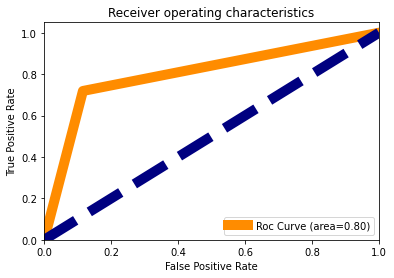

In [309]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [310]:
from sklearn.metrics import f1_score
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='macro')
knn_f1=f1_score(y_true, pred_knn, average='macro')
svcr_f1=f1_score(y_true, pred_svcr, average='macro')

rf_f1=f1_score(y_true, pred_rf, average='macro')
ad_f1=f1_score(y_true, pred_ad, average='macro')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)

print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.7820996922710987
knn f1 score 0.7820996922710987
svcr f1 score 0.8178585500394011
rf f1 score 0.8635692888869214
ad f1 score 0.8275247126021592


In [312]:
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='weighted')
knn_f1=f1_score(y_true, pred_knn, average='weighted')
svcr_f1=f1_score(y_true, pred_svcr, average='weighted')

rf_f1=f1_score(y_true, pred_rf, average='weighted')
ad_f1=f1_score(y_true, pred_ad, average='weighted')


print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)

print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.7813926446012196
knn f1 score 0.7813926446012196
svcr f1 score 0.817577817178881
rf f1 score 0.8636799622235012
ad f1 score 0.8273882975311412


# The best model is RandomForestClassifier.
Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.

Cross validation score is:- 85.227
Accuracy_score is :- 86.363

# Model Saving

In [313]:
import pickle
filename = 'inhouse_telecom.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion

In [314]:
import numpy as np
a=np.array(y_test)
a

array([0, 0, 1, ..., 0, 1, 0])

In [315]:
predicted=np.array(svcr.predict(x_test))
predicted

array([0, 0, 1, ..., 0, 1, 0])

In [316]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,1,0
...,...,...
1799,1,1
1800,0,1
1801,0,0
1802,1,1


# From the above table the model is predicted the values with 85 percent accuracy